In [1]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns

In [ ]:
df_merged = pd.read_csv('yourDomain/Documents/Fertility-Rate-Prediction/data/clean/final_merged_dataset_v2.csv')
df_merged = df_merged.rename(columns={'Fertirity rate' : 'Fertility rate'})
display(df_merged.head(5))

,Country Name,Country Code,Year,Female share of employment in senior and middle management (%),"Maternal mortality ratio (per 100,000 live births)","Labor force participation rate, female (%)",advanced_education_pct,basic_education_pct,Fertility rate,Urban population over total population,Capitial GDP in USD,Access to electricity (% of population),WagedFemale,InfantMortality,LifeExpectancy
0,Afghanistan,AFG,1960.0,NaN,NaN,NaN,NaN,NaN,7.282,8.401,NaN,NaN,NaN,251.2,32.799
1,Afghanistan,AFG,1961.0,NaN,NaN,NaN,NaN,NaN,7.284,8.684,NaN,NaN,NaN,248.4,33.291
2,Afghanistan,AFG,1962.0,NaN,NaN,NaN,NaN,NaN,7.292,8.976,NaN,NaN,NaN,245.4,33.757
3,Afghanistan,AFG,1963.0,NaN,NaN,NaN,NaN,NaN,7.302,9.276,NaN,NaN,NaN,242.5,34.201
4,Afghanistan,AFG,1964.0,NaN,NaN,NaN,NaN,NaN,7.304,9.586,NaN,NaN,NaN,239.7,34.673


**I) Missing value duel**

In [3]:
# drop row that not na for Fetility rate
df_merged = df_merged[~df_merged['Fertility rate'].isna()]

# droping countries
drop_countries = [
    'AFE', 'AFW', 'ARB', 'CEB', 'CSS', 'EAP', 'EAR', 'EAS', 'ECA', 'ECS', 
    'EMU', 'EUU', 'FCS', 'HIC', 'HPC', 'IBD', 'IBT', 'IDA', 'IDB', 'IDX',
    'INX', 'LAC', 'LCN', 'LDC', 'LIC', 'LMC', 'LMY', 'LTE', 'MEA', 'MIC',
    'MNA', 'NAC', 'OED', 'OSS', 'PRE', 'PSS', 'PST', 'SAS', 'SSA', 'SSF',
    'SST', 'TEA', 'TEC', 'TLA', 'TMN', 'TSA', 'TSS', 'UMC', 'WLD'
] 
df_merged_edited = df_merged[~df_merged['Country Code'].isin(drop_countries)]

print(f"Null values for each column:")
null_values = df_merged_edited.isna().sum().sort_values(ascending=False) / df_merged_edited.shape[0]
display(null_values)

# drop columns that have high null values
drop_columns = ['Female share of employment in senior and middle management (%)',
       'advanced_education_pct', 'basic_education_pct',
       'Labor force participation rate, female (%)',
       'Access to electricity (% of population)', 'WagedFemale']


df_merged_edited = df_merged_edited.drop(columns= drop_columns)

display(df_merged_edited.describe())



Null values for each column:


Female share of employment in senior and middle management (%)    0.880413
advanced_education_pct                                            0.835667
basic_education_pct                                               0.834584
Labor force participation rate, female (%)                        0.666426
WagedFemale                                                       0.585883
Access to electricity (% of population)                           0.528580
Maternal mortality ratio (per 100,000 live births)                0.454316
InfantMortality                                                   0.216657
Capitial GDP in USD                                               0.179850
LifeExpectancy                                                    0.064954
Urban population over total population                            0.009238
Country Name                                                      0.000000
Country Code                                                      0.000000
Year                     

,Year,"Maternal mortality ratio (per 100,000 live births)",Fertility rate,Urban population over total population,Capitial GDP in USD,InfantMortality,LifeExpectancy
count,13856.000000,7561.000000,13856.000000,13728.000000,11364.000000,10854.000000,12956.000000
mean,1991.541065,231.786536,3.810230,51.780751,9447.063172,48.157785,65.393355
std,18.470175,402.660968,1.991185,25.741719,18656.498109,45.051783,11.195678
min,1960.000000,1.000000,0.586000,2.077000,11.801322,1.400000,10.989000
25%,1976.000000,18.000000,2.019000,30.795750,600.509757,13.200000,58.710500
50%,1992.000000,71.000000,3.235500,50.870000,2130.332582,32.400000,68.166500
75%,2008.000000,291.000000,5.681250,72.716750,9157.198978,71.500000,73.512250
max,2023.000000,8045.000000,8.864000,100.000000,256580.515123,472.500000,86.372000


II) Data corelation

In [4]:
df_corr = df_merged_edited.drop(columns =['Country Name', 'Country Code'],inplace = False)
df_corr = df_merged_edited.select_dtypes(include=['number'])

print(f"Correlation of features with Fetility rate")
print(df_corr.corr()[['Fertility rate']].sort_values(by= 'Fertility rate', ascending= False))

Correlation of features with Fetility rate
                                                    Fertility rate
Fertility rate                                            1.000000
InfantMortality                                           0.830195
Maternal mortality ratio (per 100,000 live births)        0.687588
Capitial GDP in USD                                      -0.435065
Year                                                     -0.482118
Urban population over total population                   -0.613451
LifeExpectancy                                           -0.844801


CORRELATION HEATMAP BETWEEN FEATURES


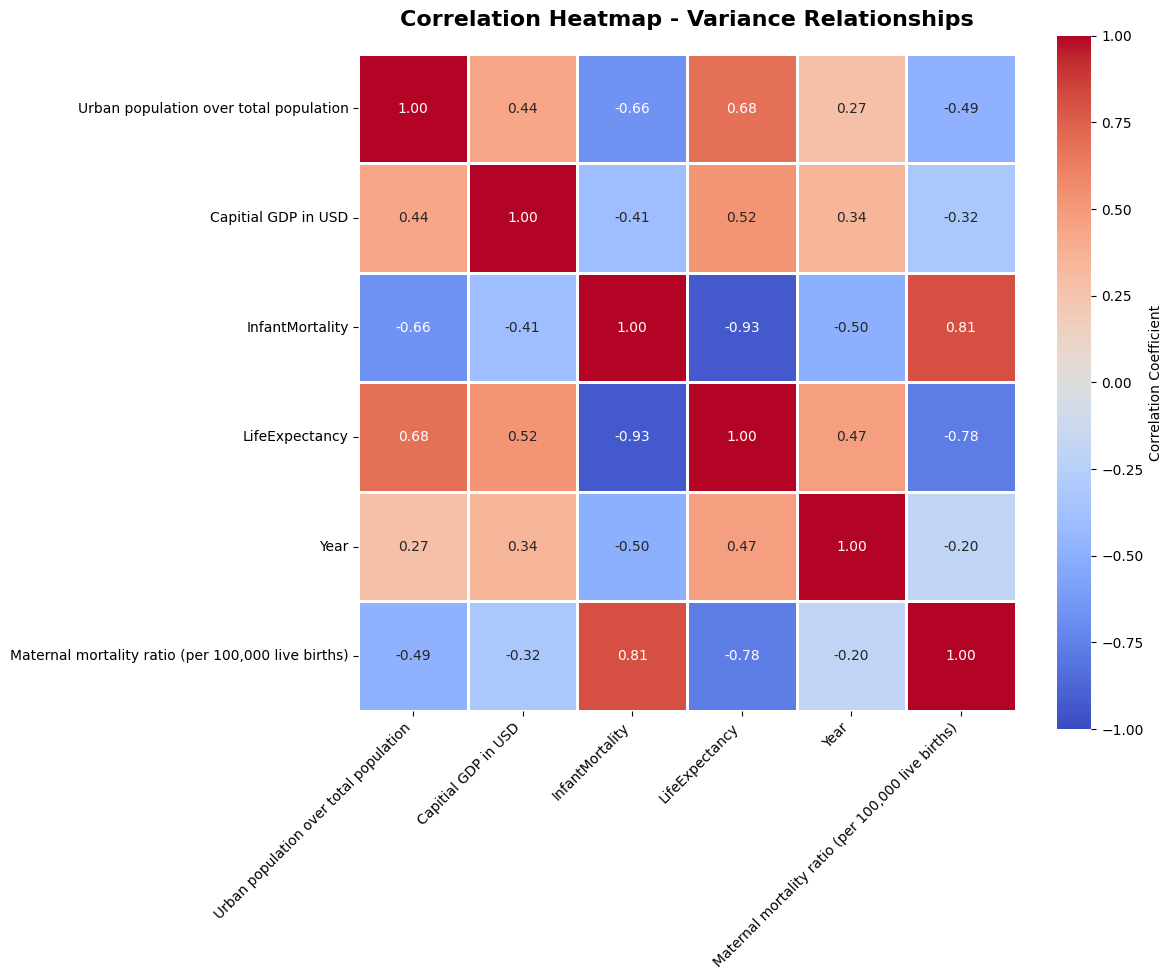

In [5]:
# Coreliation Heat map
features = ['Urban population over total population', 'Capitial GDP in USD',
'InfantMortality', 'LifeExpectancy','Year','Maternal mortality ratio (per 100,000 live births)']


print("="*60)
print("CORRELATION HEATMAP BETWEEN FEATURES")
print("="*60)

plt.figure(figsize=(12, 10))
correlation_matrix = df_merged_edited[features].corr()

sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            fmt='.2f',   # Format to 2 decimal places
            cmap='coolwarm',  # Color scheme
            center=0,    # Center colormap at 0
            square=True, # Make cells square
            linewidths=1,
            cbar_kws={'label': 'Correlation Coefficient'},
            vmin=-1, vmax=1)

plt.title('Correlation Heatmap - Variance Relationships', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [6]:
# Taking only features data 
X_feature = df_merged_edited[features]
y = df_merged_edited['Fertility rate']

# Impute missing values and save the result
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X_feature)


X_imputed = pd.DataFrame(X_imputed, columns=X_feature.columns, index=X_feature.index)


X = add_constant(X_imputed)

# Calculate VIF
vif_series = pd.Series([variance_inflation_factor(X.values, i) 
                        for i in range(X.shape[1])], index=X.columns)

print("Variance Inflation Factors:")
display(vif_series)


Variance Inflation Factors:


const                                                 17306.756117
Urban population over total population                    1.946512
Capitial GDP in USD                                       1.620742
InfantMortality                                           7.639591
LifeExpectancy                                            8.518528
Year                                                      1.454958
Maternal mortality ratio (per 100,000 live births)        3.150509
dtype: float64

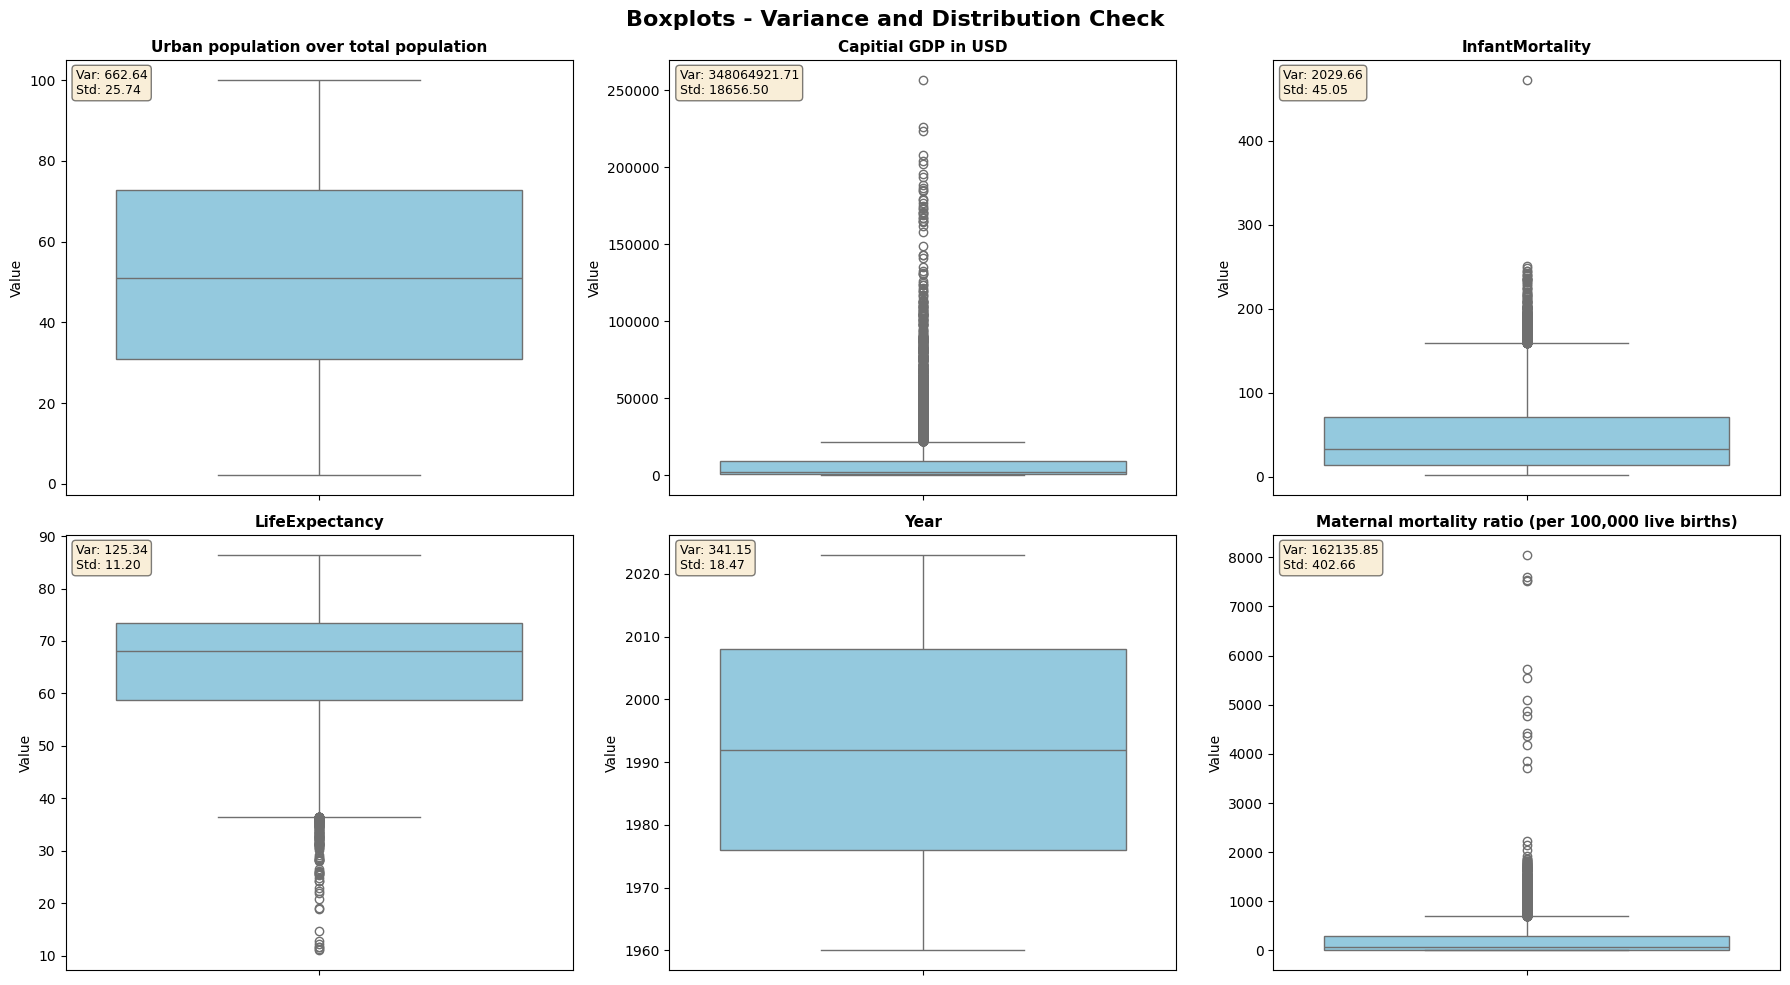

In [7]:
# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Boxplots - Variance and Distribution Check', fontsize=16, fontweight='bold')

axes = axes.flatten()

for idx, col in enumerate(features):
    if col in X_imputed.columns:
        # Create boxplot
        sns.boxplot(y=df_merged_edited[col], ax=axes[idx], color='skyblue')
        axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
        axes[idx].set_ylabel('Value')
        
        # Add variance and std as text
        var = df_merged_edited[col].var()
        std = df_merged_edited[col].std()
        axes[idx].text(0.02, 0.98, f'Var: {var:.2f}\nStd: {std:.2f}', 
                      transform=axes[idx].transAxes, 
                      verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                      fontsize=9)

plt.tight_layout()
plt.show()

III) Exporting model Building data

In [8]:
# merging the data filled with non values
df_final = df_merged_edited.copy()
df_final[features] = X_imputed

df_final.to_csv('Lasso_model_data.csv')


IV) Summary of analysing

## Data Preprocessing and Feature Selection

### Dropped Columns

In our final preprocessing step, we decided to drop **5 columns** from the original dataset due to excessive missing values (>50%):

- `Female share of employment in senior and middle management (%)`
- `advanced_education_pct`
- `basic_education_pct`
- `Labor force participation rate, female (%)`
- `Access to electricity (% of population)`
- `WagedFemale`

### Feature Correlation Analysis

The selected feature set demonstrates a **strong correlation** with our target variable, **Fertility Rate**. However, multicollinearity was observed among several predictor variables.

#### Multicollinearity Concerns

Particularly high Variance Inflation Factor (VIF) values were detected for:

| Feature | VIF Score | Interpretation |
|---------|-----------|----------------|
| `InfantMortality` | 7.64 | Moderate multicollinearity |
| `LifeExpectancy` | 8.52 | Moderate multicollinearity |

*Note: VIF values above 5-10 indicate problematic multicollinearity that may affect model interpretation.*

### Variance and Distribution Analysis

Analysis of feature variance revealed:

- **Normal distribution**: `Year` and `Urban Population over Total Population`
- **Right-skewed**: Features such as `Capital GDP in USD` and `Infant Mortality`
- **Left-skewed**: `Life Expectancy`

### Recommendations

⚠️ **Important**: Due to the observed skewness and varying scales across features, **data scaling/normalization is required** before model training to ensure optimal performance and convergence.